# Bosch Production Line Performance

Aim: 
Predict internal failures using thousands of measurements and tests made for each component along the assembly line,to enable Bosch to bring quality products at lower costs to the end user i.e. predict if a product gives 1 or 0.

The dataset is divided on the basis of data-type.I am using only numerical values for this project.

In [1]:
#import required libraries
import pandas as pd
import numpy as np 

In [2]:
#read the partial data from files
#loading only part of the data
train_data_num=pd.read_csv(r'C:\Users\meghs\Downloads\bosch-production-line-performance\train_numeric.csv',nrows=20000) 
print(train_data_num.shape)
train_data_num.head()

(20000, 970)


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
train_data_num=train_data_num.dropna(axis=1,thresh = int(len(train_data_num)*0.3)) #drop if a feature has NaN more than %
train_data_num = train_data_num.fillna(0) #Kepping it simple by filling NaN with 0
print(train_data_num.shape)
train_data_num.head() #features reduced

(20000, 174)


,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S36_F3924,L3_S36_F3926,L3_S36_F3930,L3_S36_F3934,L3_S36_F3938,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,-0.030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,0.083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
train_data_num.describe()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S36_F3924,L3_S36_F3926,L3_S36_F3930,L3_S36_F3934,L3_S36_F3938,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,19967.531350,-0.000955,-0.001188,0.001496,0.001391,-0.000146,0.002605,0.000252,0.001476,-0.000491,...,0.000021,-0.000003,0.000007,0.000023,0.000067,7.500000e-07,0.000019,0.000014,0.000033,0.005600
std,11555.759467,0.060993,0.070782,0.161779,0.161943,0.071513,0.124073,0.014849,0.080411,0.086990,...,0.080757,0.000066,0.000656,0.001026,0.004719,8.573100e-05,0.002435,0.000535,0.001546,0.074625
min,4.000000,-0.363000,-0.429000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.393000,...,-0.275000,-0.002000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9974.750000,-0.010000,-0.011000,-0.052000,-0.052000,-0.013000,0.000000,-0.007000,-0.032000,-0.021000,...,-0.019000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,19924.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,30033.500000,0.016000,0.019000,0.000000,0.000000,0.031000,0.070000,0.000000,0.008000,0.015000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,40065.000000,0.278000,0.280000,0.567000,0.566000,0.292000,0.206000,0.096000,0.528000,0.393000,...,0.531000,0.001000,0.090000,0.121000,0.632000,1.200000e-02,0.344000,0.056000,0.192000,1.000000


In [6]:
#divide the data into train/validation & test data
train_num = train_data_num[:15000]
test_num = train_data_num[15000:] #pristne testing data

In [7]:
#Check if data is imabalanced
pd.value_counts(train_num["Response"].values, sort=False) #Highly unbalance dataset

0    14912
1       88
dtype: int64

In [8]:
print('Proportion:', round(14912 / 88, 2), ': 1')

Proportion: 169.45 : 1


In [9]:
#A visual of unbalanced data
train_num["Response"].value_counts().plot(kind='bar', title='Count (target)');

In [11]:
#Re-sampling data to atleast get 60-40 ratio of classes

# Divide by class
df_class_0 = train_num[train_num["Response"] == 0]
df_class_1 = train_num[train_num["Response"] == 1]

Random under-sampling:
1    8000
0    7000
Name: Response, dtype: int64


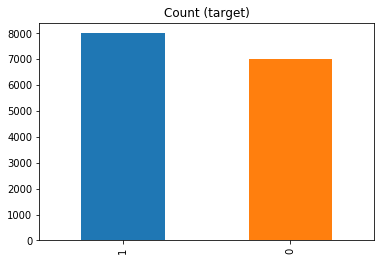

In [25]:
#undersampling
df_class_0_under = df_class_0.sample(7000)

#oversampling
df_class_1_over = df_class_1.sample(8000,replace=True)

df_test = pd.concat([df_class_0_under, df_class_1_over], axis=0)

print('Random under-sampling:')
print(df_test["Response"].value_counts())

df_test["Response"].value_counts().plot(kind='bar', title='Count (target)');


In [26]:
#Remove ID and Response

X=df_test
y=df_test["Response"]
X=X.iloc[:,1:-1] #remove I and Response
print(X.head(),y.head())

       L0_S0_F0  L0_S0_F2  L0_S0_F4  L0_S0_F6  L0_S0_F8  L0_S0_F10  L0_S0_F12  \
13121     0.000     0.000     0.000     0.000     0.000      0.000      0.000   
1776      0.000     0.000     0.000     0.000     0.000      0.000      0.000   
5109     -0.095    -0.071    -0.052    -0.016    -0.100      0.025      0.022   
5707     -0.095    -0.101     0.385     0.348     0.031     -0.112      0.008   
6549      0.088     0.063    -0.179    -0.197    -0.187     -0.384     -0.022   

       L0_S0_F14  L0_S0_F16  L0_S0_F18      ...       L3_S36_F3922  \
13121      0.000      0.000      0.000      ...                0.0   
1776       0.000      0.000      0.000      ...                0.0   
5109       0.048     -0.112     -0.019      ...                0.0   
5707       0.048      0.224      0.099      ...                0.0   
6549      -0.112     -0.092     -0.030      ...                0.0   

       L3_S36_F3924  L3_S36_F3926  L3_S36_F3930  L3_S36_F3934  L3_S36_F3938  \
13121        

In [27]:
#Import `RandomForestClassifier`
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
names = X.columns.values
# Build the model
rfc = RandomForestClassifier(random_state=0)
# Fit the model
rfc.fit(X, y)


C:\Users\meghs\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.01)

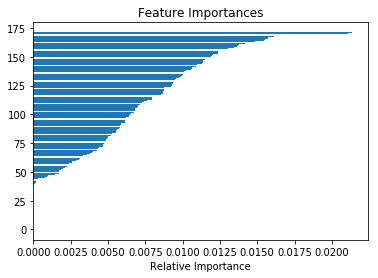

In [28]:
from sklearn.feature_selection import SelectFromModel
importances = rfc.feature_importances_
indices = np.argsort(importances)


plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.xlabel('Relative Importance')

sfm = SelectFromModel(rfc, threshold=0.01)
sfm.fit(X,y)

In [29]:
names = X.columns.values
RF_col = []
for feature_list_index in sfm.get_support(indices=True): 
    #print(names[feature_list_index])
    RF_col.append(names[feature_list_index])
print('\n Columns chosen using Random Forest:\n',RF_col)




 Columns chosen using Random Forest:
 ['L0_S0_F4', 'L0_S0_F12', 'L0_S0_F18', 'L0_S1_F28', 'L3_S29_F3324', 'L3_S29_F3327', 'L3_S29_F3333', 'L3_S29_F3348', 'L3_S29_F3351', 'L3_S29_F3373', 'L3_S29_F3382', 'L3_S29_F3388', 'L3_S29_F3401', 'L3_S29_F3424', 'L3_S29_F3427', 'L3_S29_F3455', 'L3_S29_F3458', 'L3_S29_F3479', 'L3_S30_F3534', 'L3_S30_F3544', 'L3_S30_F3554', 'L3_S30_F3574', 'L3_S30_F3579', 'L3_S30_F3644', 'L3_S30_F3649', 'L3_S30_F3684', 'L3_S30_F3749', 'L3_S30_F3754', 'L3_S30_F3759', 'L3_S30_F3774', 'L3_S30_F3794', 'L3_S30_F3804', 'L3_S30_F3809', 'L3_S30_F3819', 'L3_S33_F3857', 'L3_S33_F3859', 'L3_S33_F3861']


In [30]:
X=X[RF_col]
print('\n Shape of data after choosing important features:',X.shape)


 Shape of data after choosing important features: (15000, 37)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(penalty='l2',random_state=42, solver='saga')
lr.fit(X_train,y_train)
print('Logistic regression,with features extracted by RF')
print('Score for training data:',lr.score(X_train,y_train))
y_val_pred=lr.predict(X_val)
print('Score for validation data:',lr.score(X_val,y_val))

Logistic regression,with features extracted by RF
Score for training data: 0.6825714285714286
Score for validation data: 0.6731111111111111


In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(confusion_matrix)

[[1280  820]
 [ 651 1749]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.66      0.61      0.64      2100
           1       0.68      0.73      0.70      2400

   micro avg       0.67      0.67      0.67      4500
   macro avg       0.67      0.67      0.67      4500
weighted avg       0.67      0.67      0.67      4500



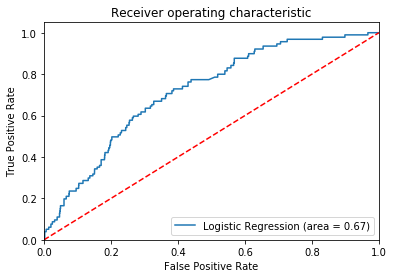

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, lr.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [36]:
X_test=test_num
y_test=test_num["Response"]
X_test=X_test.iloc[:,1:-1] #remove I and Response
X_test=X_test[RF_col]

In [37]:
y_pred=lr.predict(X_test)
print('Score for test data:',lr.score(X_test,y_test))

Score for test data: 0.6002


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75      4976
           1       0.00      0.33      0.01        24

   micro avg       0.60      0.60      0.60      5000
   macro avg       0.50      0.47      0.38      5000
weighted avg       0.99      0.60      0.75      5000



Since the data had many 0's and Nan's with hi

In [56]:
#test_num=pd.read_csv(r'C:\Users\meghs\Downloads\bosch-production-line-performance\test_numeric.csv',nrows=10000)
#X_test=test_num.iloc[:,1:] #remove Id and Response
#X_test= X_test.fillna(0) #Kepping it simple by filling NaN with 0
#X_test=X_test[RF_col]
#X_test.head()


#prediction=lr.predict(X_test)


#my_submission = pd.DataFrame({'Id': test_num.Id, 'Pass/Fail': prediction})
# you could use any filename. We choose submission here
#my_submission.to_csv('submission.csv', index=False)